In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

In [2]:
size = 1024
rng = np.random.default_rng()
noise = rng.normal(scale=np.sqrt(0.01), size=size)

x = np.sin(32 * np.linspace(0, 2 * np.pi, size))
y = np.cos(128 * np.linspace(0, 2 * np.pi, size)) + x
window = signal.get_window("hann", size)
scale = 1.0 / (size * (window*window).sum())

X = np.fft.rfft(x * window)
Y = np.fft.rfft(y * window)
CSD_XY = np.abs(X * np.conjugate(Y)) * scale
CSD_XY[1:] = CSD_XY[1:] * 2

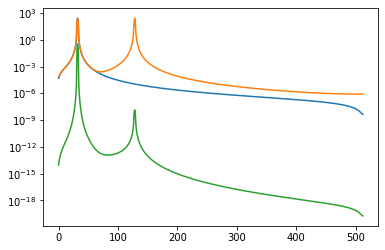

In [3]:
plt.semilogy(np.abs(np.fft.rfft(x * window)))
plt.semilogy(np.abs(np.fft.rfft(y * window)))
plt.semilogy(CSD_XY)
plt.show()

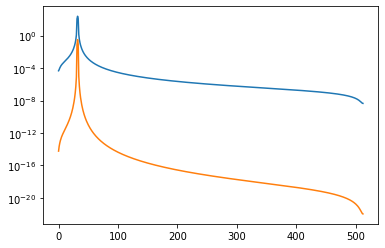

In [4]:
PSD_XX = np.abs(X * np.conjugate(X)) * scale
PSD_XX[1:] = PSD_XX[1:] * 2

plt.semilogy(np.abs(np.fft.rfft(x * window)))
plt.semilogy(PSD_XX)
plt.show()